# Diffusjonslikning og enkel diffusjon
Bruker sympy til å vise at ei bell-kurve løyser bølgjelikninga,
og implementerer enkel diffusjon utan potensial.

In [7]:
import matplotlib as mpl

# nice big latex-flavored plots
# if you don't have these fonts, or you don't have
# XeLaTeX installed, this needs to be modified.
fontsize = 20
newparams = {
    'axes.titlesize': fontsize,
    'axes.labelsize': fontsize,
    'lines.linewidth': 2, 
    'lines.markersize': 7,
    'text.usetex': True,
    'font.family': "serif",
    "pgf.texsystem": "pdflatex",
    "pgf.rcfonts": True,
    'figure.figsize': (16,9), 
    'ytick.labelsize': fontsize,
    'xtick.labelsize': fontsize,
    'legend.fontsize': fontsize,
    'legend.handlelength': 1.5,
    'xtick.major.pad': 8,
    'ytick.major.pad': 8,
}

# !!!
# for some reason, on some machines, you need to run this cell twice
# it probably has something to do with python versions or something
# !!!
%matplotlib inline

# makes mpl use the pgf-renderer. sometimes (but not on all machines)
# this disables rendering in the notebook.
# if this happens on your machine, maybe use
# another backend while working, and switch
# to pgf when you want to generate the final plots.

import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

# right angles never hurt anyone,
# so use classic as a base theme
plt.style.use('classic')
# the gray border is not visible in the plot rendered
# by plt.savefig, so dont't  worry about that

# finally change the necessary parameters
plt.rcParams.update(newparams)

# pretty-print sympy things
sp.init_printing()

In [2]:
D, t, x, mu = sp.symbols('D t x mu')

### Rekneoppgåve 2.1
Vil vise at
$$
\phi(x, t) = \frac{e^{- \frac{\left(- \mu + x\right)^{2}}{4 D t}}}{2 \sqrt{\pi} \sqrt{D t}}
$$
er løysing til differensiallikninga
$$
\frac{\partial \phi}{\partial t}
=
D \frac{\partial^2 \phi}{\partial x^2}
$$

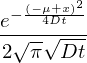

In [3]:
phi = 1/sp.sqrt(4 * sp.pi * D * t) * sp.exp(-(x - mu)**2/(4 * D * t))
phi

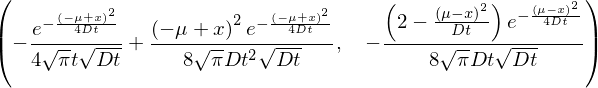

In [4]:
dphi_dt  = sp.diff(phi, t)
dphi_dxx = sp.diff(phi, x, x)

dphi_dt, dphi_dxx

In [5]:
sp.simplify(dphi_dt - D * dphi_dxx)

In [10]:
# start parameters: N = #particles, T = #steps
N = 100000
T = 100
pos = np.zeros(N)

# step length
h = 0.5

for t in range(T):
    hs = np.random.randint(0, 2, size=N) * 2 - 1
    pos += hs * h

In [11]:
import scipy.stats as st
mu, sig = st.norm.fit(pos)
mu, sig

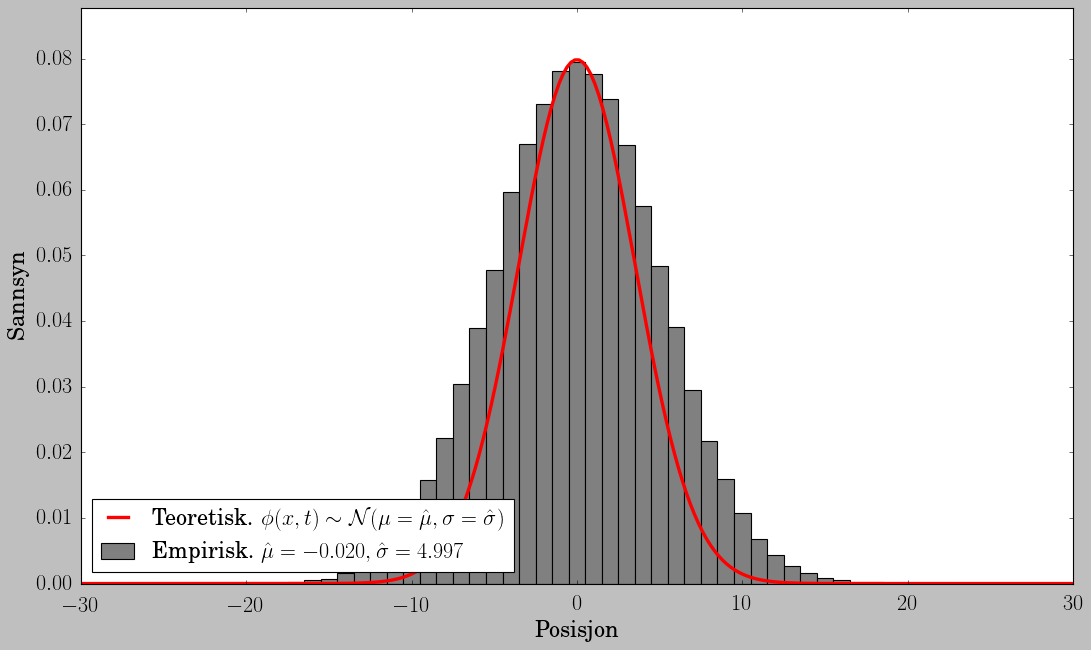

In [20]:
unique, count = np.unique(pos, return_counts=True)
plt.bar(
    unique, count / N, 
    color='gray', 
    edgecolor="black",
    width=2*h, 
    align='center',
    label='Empirisk. $\hat\mu = {:.3f}, \hat\sigma = {:.3f}$' \
            .format(mu, sig),
)

xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 250)
ps = np.exp(-xs**2 / sig**2) / np.sqrt(2*np.pi*sig**2)

plt.plot(
    xs, ps, 'r-', 
    linewidth=3,
    label='Teoretisk. $\phi(x, t) \sim \mathcal N(\mu=\hat\mu, \sigma=\hat\sigma)$'
)

plt.ylabel(r"Sannsyn")
plt.xlabel(r"Posisjon")
plt.ylim(0, np.max(ps) * 1.1)

plt.legend(loc='lower left');

plt.savefig("walk.pdf", bbox_inches = 'tight', pad_inches = 0)